# <font color='blue'> This notebook performs unit tests on the all the individual functions of my tool suite </font>

In [1]:
import  MyToolSet as myfunc

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
filepath='train_Loan.csv'
df_source=pd.read_csv(filepath)
print(df_source.shape)
df_source.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Declarations
index_col='Loan_ID'
df_source.set_index(index_col,inplace=True)
target='Loan_Status'
predictors=list(df_source.columns.difference([target]))


In [4]:


df_source.ApplicantIncome=df_source.ApplicantIncome.astype(float)
X=df_source[predictors]
Y=df_source[target]

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33)
train=pd.concat([X_train,y_train],axis=1)

In [5]:
train.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Married               object
Property_Area         object
Self_Employed         object
Loan_Status           object
dtype: object

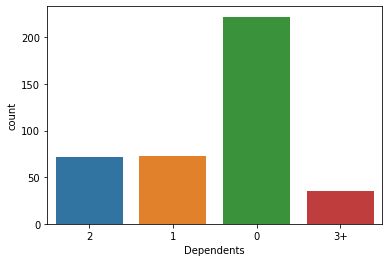

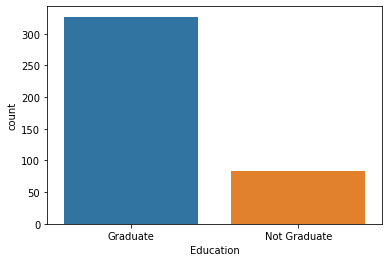

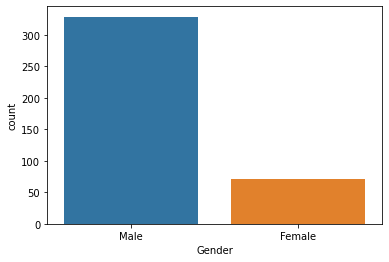

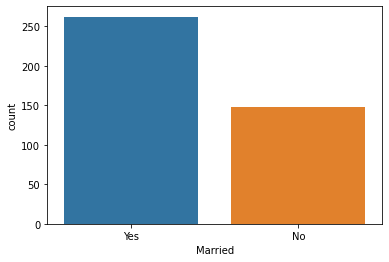

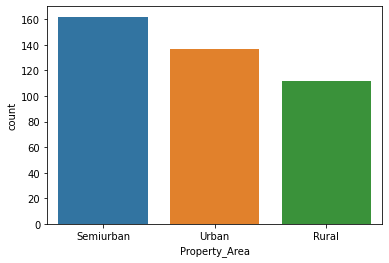

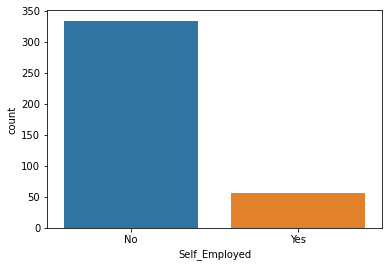

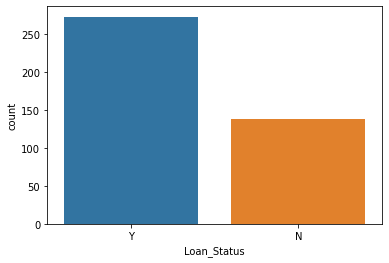

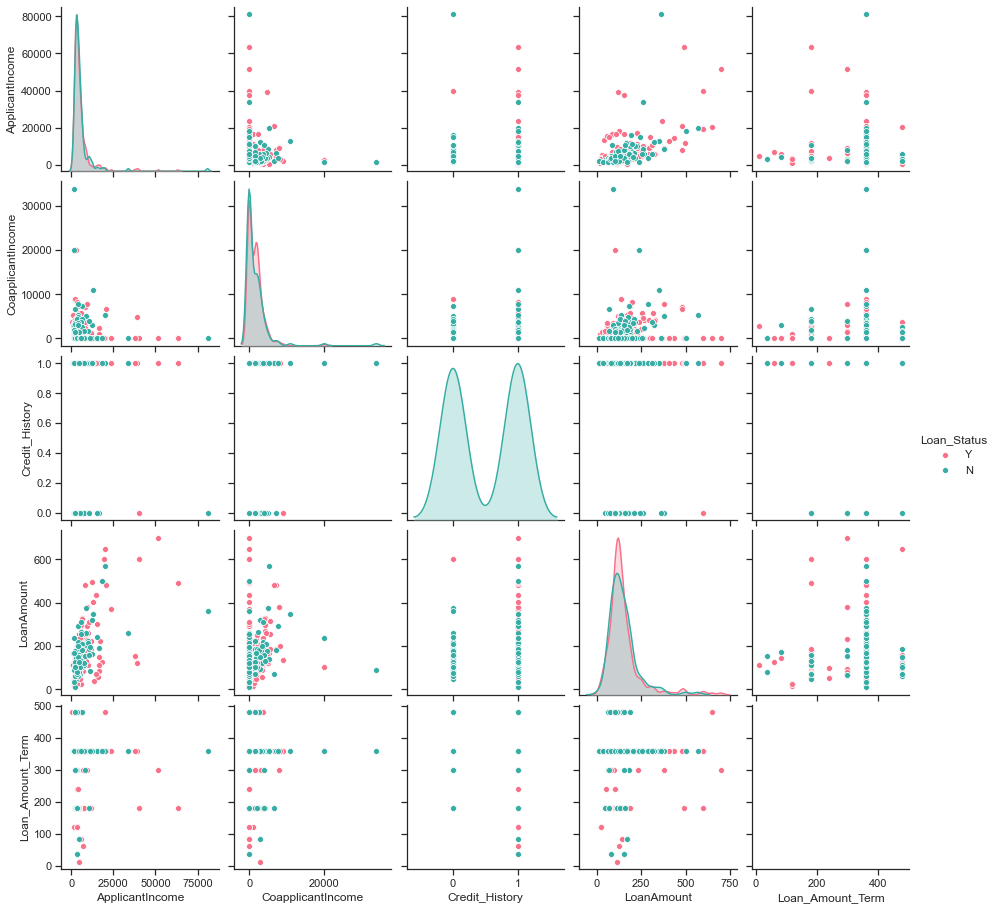

In [6]:
# Test the first function to explore data visually
myfunc.my_plot(train,'Loan_Status')

import pandas_profiling as pp
# pp.ProfileReport(train)

In [7]:
dfToPredict=pd.read_csv('test_Loan.csv').set_index('Loan_ID')
dfToPredict['Loan_Status']='NA'


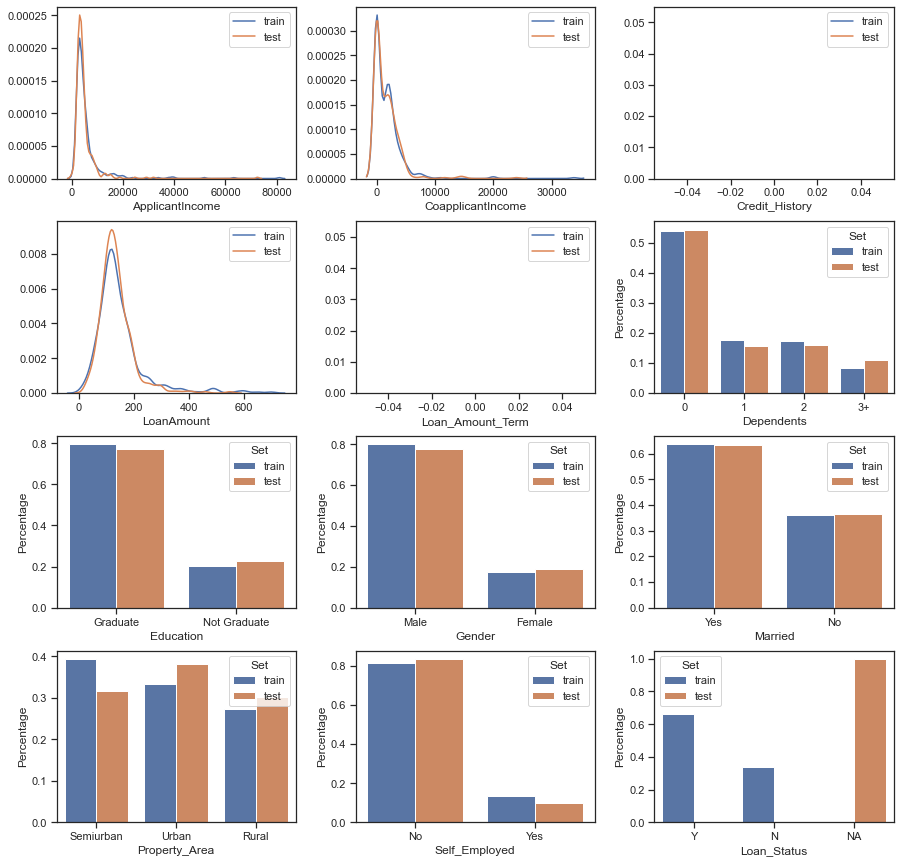

In [8]:
# Test the second function for equality check between train and test data

myfunc.distComparison(train,dfToPredict)

In [9]:
# Test the presence of missing values

myfunc.missing_values_table(train)

ApplicantIncome      float64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Married               object
Property_Area         object
Self_Employed         object
Loan_Status           object
dtype: object
Your selected dataframe has 12 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,39,9.5
Self_Employed,21,5.1
LoanAmount,14,3.4
Gender,11,2.7
Dependents,9,2.2
Loan_Amount_Term,9,2.2
Married,1,0.2


In [10]:
# df_SourceTrain.set_index(['PassengerId'],inplace=True)

df_imputedTrain=myfunc.impute_all(train)
df_imputedTrain.head()

Numerics Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')
Categories Index(['Dependents', 'Education', 'Gender', 'Loan_Status', 'Married',
       'Property_Area', 'Self_Employed'],
      dtype='object')


ApplicantIncome      float64
CoapplicantIncome    float64
Credit_History       float64
LoanAmount           float64
Loan_Amount_Term     float64
Dependents            object
Education             object
Gender                object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
dtype: object
Your selected dataframe has 12 columns.
There are 3 columns that have missing values.
Treating--> ApplicantIncome
ApplicantIncome Has no missing value.Skipping to next one
Treating--> CoapplicantIncome
CoapplicantIncome Has no missing value.Skipping to next one
Treating--> Credit_History
Treating--> Dependents
Dependents Has no missing value.Skipping 

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,
LP002529,6700.0,1750.0,1.0,230.0,300.0,2,Graduate,Male,Y,Yes,Semiurban,No
LP001543,9538.0,0.0,1.0,187.0,360.0,1,Graduate,Male,Y,Yes,Urban,No
LP001114,4166.0,7210.0,1.0,184.0,360.0,0,Graduate,Male,Y,No,Urban,No
LP002941,6383.0,1000.0,1.0,187.0,360.0,2,Not Graduate,Male,N,Yes,Rural,Yes
LP001664,4191.0,0.0,1.0,120.0,360.0,0,Graduate,Male,Y,No,Rural,No



 --- Outlier removal process triggered,with shape of data, (411, 13)

----------------------------------- Percentage of data points flagged as outliers  5.11  %---------------
 1    390
-1     21
Name: anomaly, dtype: int64


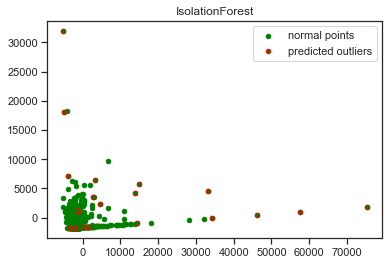

(390, 13)


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,6700.0,1750.0,1.0,2,Graduate,Male,230.0,300.0,LP002529,Y,Yes,Semiurban,No
1,9538.0,0.0,1.0,1,Graduate,Male,187.0,360.0,LP001543,Y,Yes,Urban,No
2,4166.0,7210.0,1.0,0,Graduate,Male,184.0,360.0,LP001114,Y,No,Urban,No
3,6383.0,1000.0,1.0,2,Not Graduate,Male,187.0,360.0,LP002941,N,Yes,Rural,Yes
4,4191.0,0.0,1.0,0,Graduate,Male,120.0,360.0,LP001664,Y,No,Rural,No


In [11]:
# df_imputedTrain=df_imputedTrain.drop(columns=['Cabin'])
df_original,dfimputedTrain=myfunc.outlier_detection(df_imputedTrain.reset_index())
print(dfimputedTrain.shape)
dfimputedTrain.head()

In [12]:
dfProcessed=myfunc.pre_process(df_imputedTrain,'standard')
dfProcessed.describe()


 Scaling of features completed

 Encoding categories
Index(['Dependents', 'Education', 'Gender', 'Loan_Status', 'Married',
       'Property_Area', 'Self_Employed'],
      dtype='object')


,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
count,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,3.011919e-17,1.643724e-16,1.034587e-16,8.151090e-17,2.836336e-18,2.446472,0.704380,1.440389,1.164234,0.821168,1.030414,0.619221
std,1.001219e+00,1.001219e+00,1.001219e+00,1.001219e+00,1.001219e+00,1.764843,0.642737,0.668209,0.688189,0.890272,1.168110,0.725234
min,-7.190715e-01,-6.056097e-01,-2.197692e+00,-1.521480e+00,-5.305422e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.006625e-01,-6.056097e-01,4.589297e-01,-5.239540e-01,2.088858e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,-2.577222e-01,-1.580292e-01,4.589297e-01,-2.279847e-01,2.088858e-01,4.000000,1.000000,2.000000,1.000000,0.500000,0.500000,0.500000
75%,2.985931e-02,2.657516e-01,4.589297e-01,2.214502e-01,2.088858e-01,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.067009e+01,1.187978e+01,4.589297e-01,6.053142e+00,2.110371e+00,5.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000


In [13]:
dfProcessed.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
0,0.139137,0.040116,0.45893,0.901084,-0.741857,4,1,2,1,0,0,0
1,0.541383,-0.605610,0.45893,0.429725,0.208886,4,1,2,1,0,0,0
2,-0.220021,2.054782,0.45893,0.396839,0.208886,4,1,2,1,0,0,0
3,0.094207,-0.236623,0.45893,0.429725,0.208886,4,1,2,1,0,0,0
4,-0.216477,-0.605610,0.45893,-0.304717,0.208886,4,1,2,1,0,0,0



 Principal Component Analysis Triggered
Data is not scaled. Applying Standard Scaling with mean 0 ans s.d=1
[0.317 0.217 0.2   0.194 0.072]


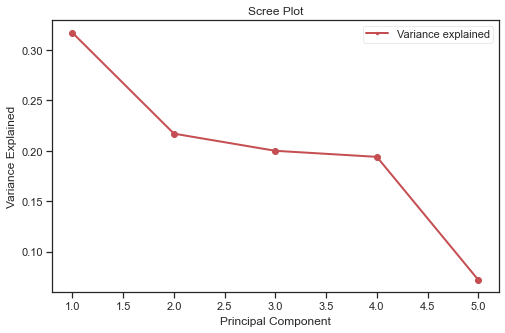

In [14]:
pca_df,maxLoading=myfunc.My_PrincipalComponentAnalysis(df_imputedTrain)

In [15]:
pca_df

,Component-1,Component-2,Component-3,Component-4,Component-5
ApplicantIncome,0.701403,-0.216931,-0.009922,-0.058974,0.676313
CoapplicantIncome,0.046677,0.753237,0.077337,0.602920,0.246904
Credit_History,0.031206,0.405748,0.671036,-0.617424,0.053787
LoanAmount,0.710111,0.162454,-0.050665,0.028117,-0.682638
Loan_Amount_Term,-0.024996,0.441081,-0.735571,-0.501006,0.112924


In [16]:
maxLoading

,Component-1,Component-2,Component-3,Component-4,Component-5
0,0.772198,0.005409,0.809715,0.129637,-0.570197
1,0.665712,-0.225454,0.080329,-0.772986,-0.028457
2,0.232488,1.938281,0.295297,0.874995,0.135907
3,0.369285,0.149486,0.113302,-0.524146,-0.239783
4,-0.387389,-0.180364,0.125058,-0.748943,-0.039649
...,...,...,...,...,...
406,-1.139922,0.231700,0.219233,-0.367808,0.488657
407,0.818054,0.012231,0.047895,-0.720332,-0.900790
408,-0.395354,0.412132,0.185120,-0.281853,0.107848
409,-0.632796,0.007948,0.155625,-0.597180,0.042909


In [17]:
# pca_df,maxLoading=myfunc.My_FactorAnalyzer(data)

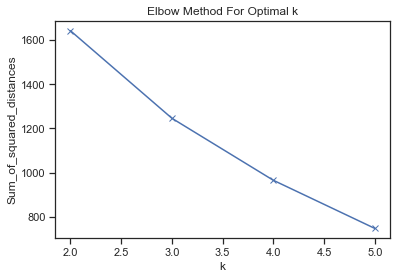

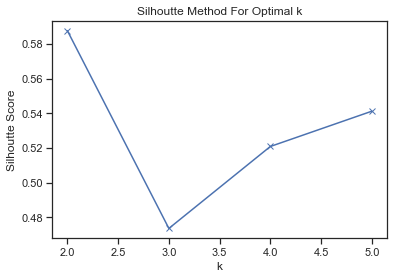

In [18]:
predict=myfunc.my_KMeans(maxLoading)

In [19]:
pd.concat([maxLoading,pd.DataFrame(predict,columns=['Cluster'])],axis=1).describe()

,Component-1,Component-2,Component-3,Component-4,Component-5,Cluster
count,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,411.000000
mean,3.741263e-17,-6.320978e-17,3.842560e-17,-3.835807e-17,-1.722061e-18,0.688564
std,1.260491e+00,1.043613e+00,1.000150e+00,9.853342e-01,6.025339e-01,1.177157
min,-1.431662e+00,-3.192521e+00,-3.070805e+00,-1.707321e+00,-2.259567e+00,0.000000
25%,-6.276639e-01,-3.254392e-01,8.116587e-02,-7.480466e-01,-1.977441e-01,0.000000
50%,-3.248987e-01,-1.139353e-01,1.448903e-01,-2.790944e-01,-1.884822e-02,0.000000
75%,1.611133e-01,4.933135e-01,1.907839e-01,4.178322e-01,1.589919e-01,1.000000
max,9.033762e+00,9.243080e+00,4.267138e+00,6.789189e+00,5.384276e+00,4.000000
